In [1]:
# import the required file documents
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets into the notebook

In [2]:
data=pd.read_csv("Telco-Customer-Churn.csv")

# Univariate Analysis of the Datasets

In [3]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Check for null values
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Deductions
All the columns of datasets do not have null values

In [5]:
# Check for information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Analysis of Customer ID

In [6]:
data['customerID'].head(10)

0    7590-VHVEG
1    5575-GNVDE
2    3668-QPYBK
3    7795-CFOCW
4    9237-HQITU
5    9305-CDSKC
6    1452-KIOVK
7    6713-OKOMC
8    7892-POOKP
9    6388-TABGU
Name: customerID, dtype: object

In [7]:
data['customerID'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: customerID
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.1+ KB


# Deductions
* The customerID column has no null values. 
* The data type of the column corresponds is correct 

# **Bivariate Analysis basing on the Questions**

## 1. Relationship between SeniorCitizen column and Monthly basis payments

In [8]:
data['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [9]:
data['MonthlyCharges'].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [10]:
data['MonthlyCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: MonthlyCharges
Non-Null Count  Dtype  
--------------  -----  
7043 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


## Deduction
*  SeniorCitizen is categorical and MonthlyCharges continous.
* ANOVA will be used to test the correlation of the datasets. **# TODO**
* Infuence of category SeniorCitizen on Monthlycharges

<Axes: title={'center': 'Barplot showing the amount remitted by Citizens monthly'}, xlabel='SeniorCitizen', ylabel='MonthlyCharges'>

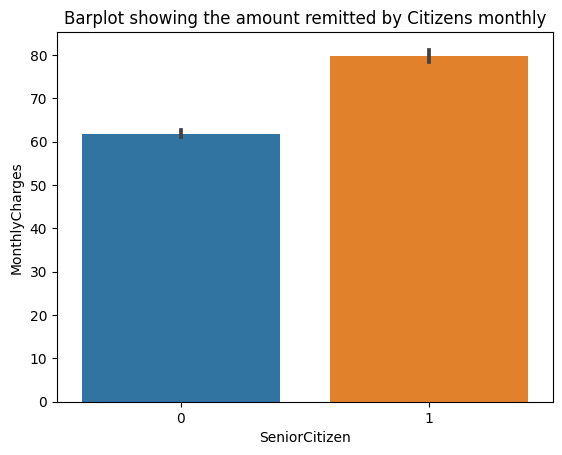

In [11]:
plt.title("Barplot showing the amount remitted by Citizens monthly")
sns.barplot(data=data, x='SeniorCitizen',y='MonthlyCharges')

## Explanations
* Senior citizens are represented by 1 while the junior citizens are represented by 0.
* From the barchart, it is evident that the senior citizens accrue more monthly charges as compared to junior citizens.

## 2. Relationship between internet service type and Total Charges


#### Change the Total Charges data type from object to float

In [31]:
# Changing from obj to float
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce')

In [32]:
# Check monthly charges datatype
data['TotalCharges'].dtype

dtype('float64')

<Axes: xlabel='InternetService', ylabel='TotalCharges'>

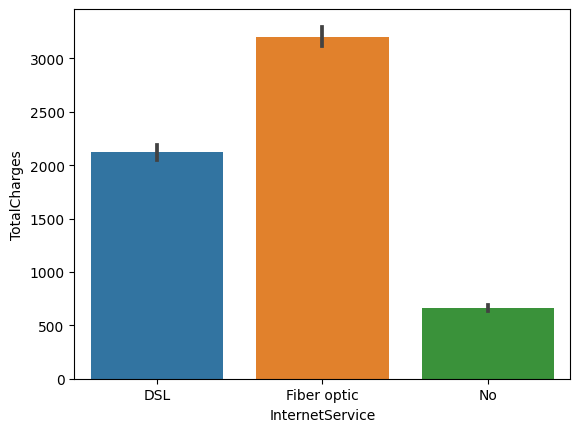

In [33]:
# Plot a barchart to show the relationship between the two variables
sns.barplot(data=data, x='InternetService', y='TotalCharges')

## Explantions
* From the data, it is evident that fiber optic is the most revenue generating plan for the company. 
* No generates the least revenue with DSL competing favorably with fiber optic.

**# TODO**

##### ANOVA analysis of the variable since one is continous/numeric while the other categorical

## 3. Ratio of customers and the type of contracts

In [27]:
# Analysis of the customerId
data['customerID'].head(10)

0    7590-VHVEG
1    5575-GNVDE
2    3668-QPYBK
3    7795-CFOCW
4    9237-HQITU
5    9305-CDSKC
6    1452-KIOVK
7    6713-OKOMC
8    7892-POOKP
9    6388-TABGU
Name: customerID, dtype: object

In [28]:
# Analysis of contract
data['Contract'].head(5)

0    Month-to-month
1          One year
2    Month-to-month
3          One year
4    Month-to-month
Name: Contract, dtype: object

In [29]:
# Check for the unique values in the contract column
data['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [ ]:
# Pie chart to visulaize the realationhip and rations of customers and their contract types

## 4. Contracts generating the most revenues

<Axes: title={'center': ' Barplot to show the revenue generated per Contract'}, xlabel='Contract', ylabel='TotalCharges'>

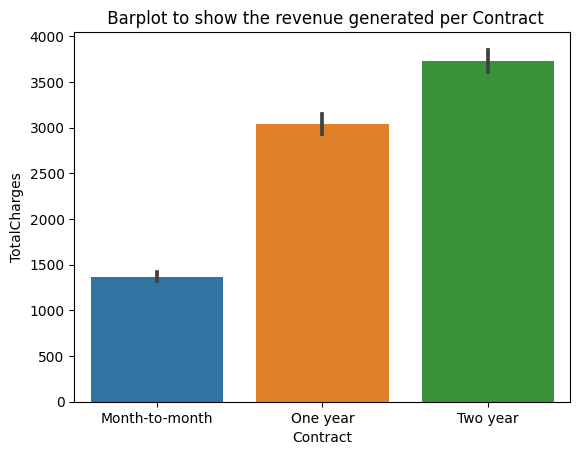

In [35]:
plt.title(" Barplot to show the revenue generated per Contract")
sns.barplot(data=data,x='Contract', y='TotalCharges')

### Explanation

From the visualization, it is evident that the two year contract is the most preferred by clients. The contract generated more revenue from the other contract types.

Month-to-month contract is the least preferred by clients since the contract generated the least revenue for the company.

**# TODO:** Since the variables are a coalesce of contract<categorical> and Total Charges<Numeric/Continous>, **ANOVA** will be used to test correlation.

## 5. Do high paying customers use stream TV or/and stream movies 

Relationship between high total charges and streaming movies and relationship between high total charges and streamingTV

In [36]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<Axes: >

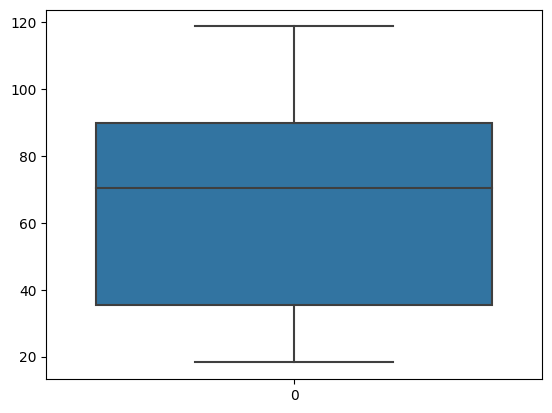

In [13]:
sns.boxplot(data=data['MonthlyCharges'])

### Deductions from the Boxplot
The Median is much closer to the upper quartile, therfore the data in the column is negatively skewed.

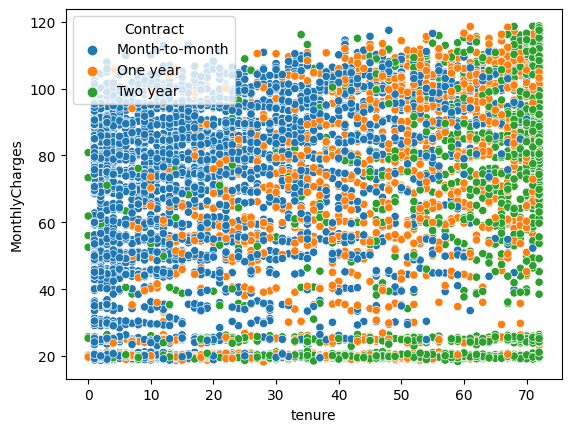

In [14]:
sns.scatterplot(data=data, x='tenure', y='MonthlyCharges', hue='Contract')
plt.show()

### Deductions from the scatter plot
There's no correlation between tenure and monthly charges.

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
data['SeniorCitizen'].tail(10)

7033    0
7034    0
7035    0
7036    0
7037    0
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, dtype: int64

# Univariate Analysis of InternetService Column

In [17]:
#Check for the top 10 values
data['InternetService'].head(10)

0            DSL
1            DSL
2            DSL
3            DSL
4    Fiber optic
5    Fiber optic
6    Fiber optic
7            DSL
8    Fiber optic
9            DSL
Name: InternetService, dtype: object

In [18]:
# Check for unique values
data['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

<Axes: xlabel='InternetService', ylabel='Count'>

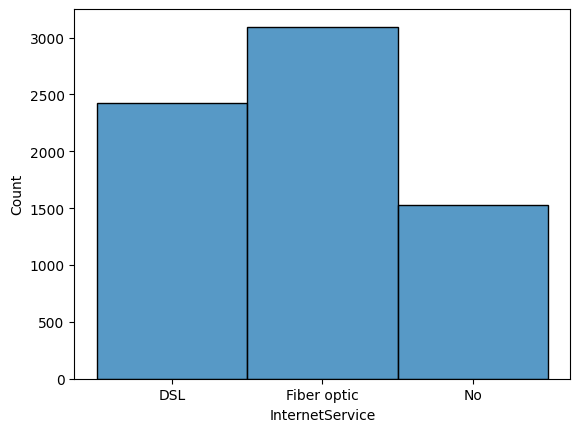

In [19]:
# Plot a histogram to visualize
sns.histplot(data=data['InternetService'])

## Qn. 2: How much is generated from each internet service package?

<Axes: xlabel='InternetService', ylabel='TotalCharges'>

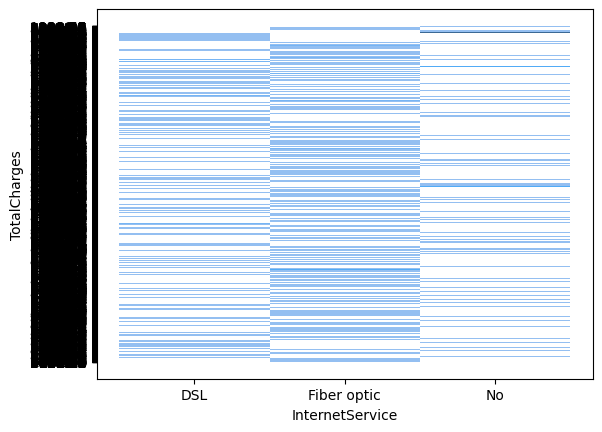

In [20]:
#Plot a barplot of total generated amounts against internet service package
sns.histplot(data=data, x='InternetService',y='TotalCharges')